In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, logging

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
logging.getLogger("tensorflow").setLevel(logging.CRITICAL)
logging.getLogger("tensorflow_hub").setLevel(logging.CRITICAL)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
!ls data

double_pole_contactor_I.npy   exhaust_fan_II.npy      pelletizer_I.npy
double_pole_contactor_II.npy  milling_machine_I.npy   pelletizer_II.npy
exhaust_fan_I.npy	      milling_machine_II.npy  train_pifpaf_v1.npy


In [10]:
pelletizer_I = np.load('./data/pelletizer_I.npy')

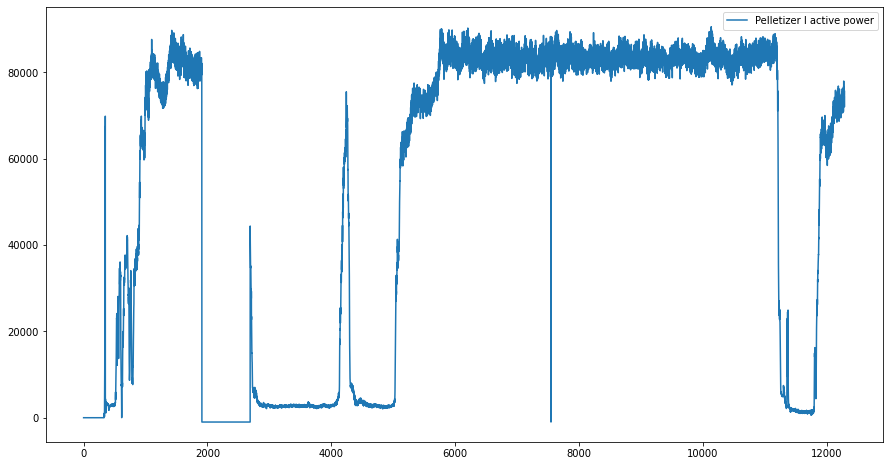

In [18]:
i = 10
plt.figure(figsize=[15, 8])
plt.plot(pelletizer_I[i*1024:(i+1)*2048, -1], label='Pelletizer I active power')
plt.legend()

In [ ]:
pelletizer_I

In [7]:
pelletizer_I[pelletizer_I['timestamp'] > '2017-12-12']

timestamp  active_power  reactive_power  apparent_power  \
1753213  2017-12-12 00:00:00-02  81942.100000      52729.2000      97441.7000   
1753214  2017-12-12 00:00:01-02  86970.200000      54883.0000     102839.0000   
1753215  2017-12-12 00:00:02-02  83479.700000      55715.3000     100365.0000   
1753216  2017-12-12 00:00:03-02  80206.100000      51688.4000      95418.6000   
1753217  2017-12-12 00:00:04-02  82388.000000      55060.9000      99093.3000   
...                         ...           ...             ...             ...   
5474426  2018-04-03 18:48:45-03      1.849620         53.4013         53.4333   
5474427  2018-04-03 18:48:46-03      0.205513        -52.4054         52.4058   
5474428  2018-04-03 18:48:47-03      0.000000        -53.8444         53.8444   
5474429  2018-04-03 18:48:48-03      0.000000         54.2554         54.2554   
5474430  2018-04-03 18:48:49-03     -2.466150        -54.4050         54.4609   

            current  voltage  
1753213  449.239000  216.865  
1753214  474.529000  216.689  
1753215  462.994000  216.852  
1753216  439.081000  217.268  
1753217  456.846000  216.986  
...             ...      ...  
5474426    0.229972  232.361  
5474427    0.226061  232.355  
5474428    0.232058  232.390  
5474429    0.234144  232.484  
5474430    0.234404  232.498  

[3721218 rows x 6 columns]

In [8]:
pelletizer_I_complete = mvlv.merge(pelletizer_I[['timestamp', 'active_power']], how='left', left_on='timestamp', right_on='timestamp')

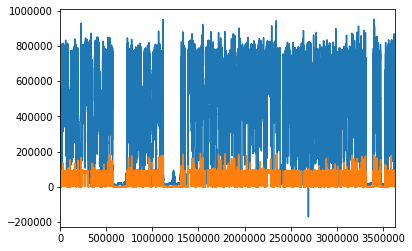

In [9]:
pelletizer_I_complete['active_power_x'].plot()
pelletizer_I_complete['active_power_y'].plot()

In [10]:
pelletizer_I_complete.head()

timestamp  active_power_x  reactive_power  apparent_power  \
0  2017-12-11 18:43:52-02         8.22051         213.575         213.733   
1  2017-12-11 18:43:53-02        11.50870         213.423         213.733   
2  2017-12-11 18:43:54-02        -6.57641        -207.053         207.157   
3  2017-12-11 18:43:55-02         3.28821         213.708         213.733   
4  2017-12-11 18:43:56-02         0.00000         213.733         213.733   

    current  voltage  active_power_y  
0  0.031497  6816.27        0.000000  
1  0.031358  6818.05       -0.411026  
2  0.030559  6815.92        0.000000  
3  0.031567  6818.64       -1.027560  
4  0.031358  6816.72       -0.205513

In [11]:
pelletizer_I_complete.shape

(3631308, 7)

In [12]:
pelletizer_I_complete = pelletizer_I_complete.rename(columns={'active_power_x': 'active_power', 'active_power_y': 'pelletizer_I'})

In [13]:
df = pelletizer_I_complete.set_index(pd.to_datetime(pelletizer_I_complete['timestamp']))

In [14]:
df.head()

timestamp  active_power  \
timestamp                                                         
2017-12-11 18:43:52-02:00  2017-12-11 18:43:52-02       8.22051   
2017-12-11 18:43:53-02:00  2017-12-11 18:43:53-02      11.50870   
2017-12-11 18:43:54-02:00  2017-12-11 18:43:54-02      -6.57641   
2017-12-11 18:43:55-02:00  2017-12-11 18:43:55-02       3.28821   
2017-12-11 18:43:56-02:00  2017-12-11 18:43:56-02       0.00000   

                           reactive_power  apparent_power   current  voltage  \
timestamp                                                                      
2017-12-11 18:43:52-02:00         213.575         213.733  0.031497  6816.27   
2017-12-11 18:43:53-02:00         213.423         213.733  0.031358  6818.05   
2017-12-11 18:43:54-02:00        -207.053         207.157  0.030559  6815.92   
2017-12-11 18:43:55-02:00         213.708         213.733  0.031567  6818.64   
2017-12-11 18:43:56-02:00         213.733         213.733  0.031358  6816.72   

                           pelletizer_I  
timestamp                                
2017-12-11 18:43:52-02:00      0.000000  
2017-12-11 18:43:53-02:00     -0.411026  
2017-12-11 18:43:54-02:00      0.000000  
2017-12-11 18:43:55-02:00     -1.027560  
2017-12-11 18:43:56-02:00     -0.205513

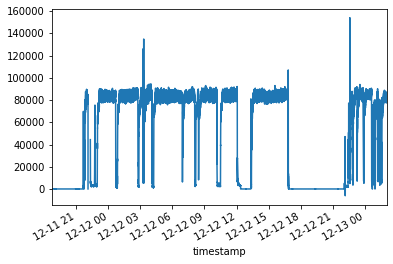

In [15]:
# df.iloc[10000:12000]['active_power'].plot()
df.iloc[0:120000]['pelletizer_I'].plot()

In [16]:
df = df.bfill().ffill()

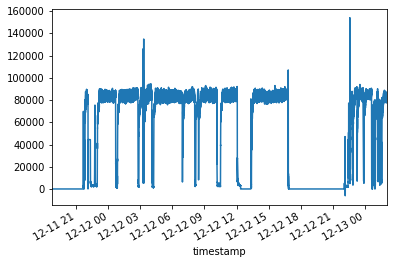

In [17]:
df.iloc[0:120000]['pelletizer_I'].plot()

In [18]:
df.to_csv('./data/pelletizer_I_train.csv')

In [19]:
aggregate = df[['active_power', 'reactive_power', 'current', 'voltage']].values
appliance = df['pelletizer_I'].values

In [20]:
aggregate.shape

(3631308, 4)

In [21]:
padding = 512 - aggregate.shape[0] % 512

In [22]:
aggregate.shape[0] % 512

204

In [23]:
appliance.shape

(3631308,)

In [24]:
aggregate = np.pad(aggregate, ((0, padding), (0, 0)), mode='constant')
appliance = np.pad(np.expand_dims(appliance, -1), ((0, padding), (0, 0)), mode='constant')

In [25]:
appliance.shape

(3631616, 1)

In [26]:
aggregate = np.reshape(aggregate, [-1, 512, 5])
appliance = np.reshape(appliance, [-1, 512, 1])

ValueError: cannot reshape array of size 14526464 into shape (512,5)

In [ ]:
pelletizer_dataset = np.concatenate([aggregate, appliance], axis=-1)
np.save(file='./data/pelletizer_I_dataset.npy', arr=pelletizer_dataset)

In [ ]:
pelletizer_dataset = np.load('./data/pelletizer_I_dataset.npy')

aggregate = pelletizer_dataset[:, :, :4]
appliance = np.expand_dims(pelletizer_dataset[:, :, -1], axis=-1)

In [66]:
aggregate[0, :, 0].shape

(512,)

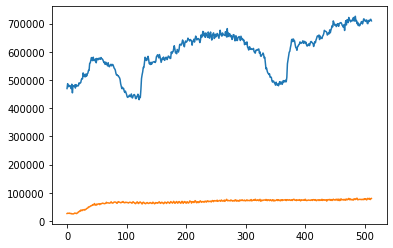

In [69]:
plt.plot(aggregate[125, :, 0])
plt.plot(appliance[125])

In [73]:
from wavenet import Wavenet

In [ ]:
# wavenet.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
from wavenet import Wavenet
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import pickle
metrics = []
models = []
i = 0
for train_index, test_index in kfold.split(aggregate):
    i += 1
    epochs = 100
    wavenet = Wavenet()
    optimizer = tf.keras.optimizers.Adam()
    features, targets = aggregate[train_index], appliance[train_index]
    eval_features, eval_targets = aggregate[test_index], appliance[test_index]
    print(tf.reduce_sum(eval_targets))
    csv_logger = tf.keras.callbacks.CSVLogger(f'./logs/pelletizer_I_{i}.log')
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)
    
    saver = tf.keras.callbacks.ModelCheckpoint(filepath=f'./trained_models/pelletizer_I_{i}/',
                                               monitor='val_loss',
                                               save_best_only=True)
    
    wavenet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),  # Optimizer
              # Loss function to minimize
              loss=tf.keras.losses.MeanSquaredError(),
              # List of metrics to monitor
              metrics=[tf.keras.metrics.MeanAbsoluteError()])
    wavenet.fit(x=features, y=targets, validation_data=(eval_features, eval_targets), epochs=200,
                callbacks=[csv_logger, reduce_lr, saver])
    
    models.append(wavenet)
    predictions = wavenet(eval_features)
    mae = tf.reduce_mean((predictions - eval_targets) ** 2)
    sae = tf.abs(tf.reduce_sum(predictions) - tf.reduce_sum(eval_targets)) / tf.reduce_sum(eval_targets) + 0.001
    f1 = f1_score(y_true=(eval_targets > 0).astype(tf.float32), y_pred=(predictions > 0).astype(tf.float32))
    metrics.append({'mae': mae, 'sae': sae, 'f1': f1})
    
    
pickle_out = open("metrics_pelletizer_I.pickle","wb")
pickle.dump(metrics, pickle_out)
pickle_out.close()
    #     train(wavenet, epochs, aggregate, appliance, eval_features, eval_targets)
    
#     wavenet.fit(x=train_ds, epochs=10, validation_data=eval_ds)

tf.Tensor(33221266814.18766, shape=(), dtype=float64)


Train on 5674 samples, validate on 1419 samples
Epoch 1/200
5674/5674 [==============================] - 131s 23ms/sample - loss: 1161090744.9954 - mean_absolute_error: 23370.6367 - val_loss: 565724492.7526 - val_mean_absolute_error: 15484.5938
Epoch 2/200
5674/5674 [==============================] - 119s 21ms/sample - loss: 545594947.8407 - mean_absolute_error: 14234.8184 - val_loss: 528559112.5736 - val_mean_absolute_error: 12526.9600
Epoch 3/200
5674/5674 [==============================] - 4408s 777ms/sample - loss: 558110879.1653 - mean_absolute_error: 14286.9844 - val_loss: 514467188.3073 - val_mean_absolute_error: 14866.3330
Epoch 4/200
5674/5674 [==============================] - 13488s 2s/sample - loss: 535693343.7180 - mean_absolute_error: 13652.0596 - val_loss: 554230471.0669 - val_mean_absolute_error: 15592.5078
Epoch 5/200
5674/5674 [==============================] - 9590s 2s/sample - loss: 545154573.4001 - mean_absolute_error: 13681.3828 - val_loss: 518662963.9915 - val_me

Epoch 37/200
5674/5674 [==============================] - 132s 23ms/sample - loss: 535092623.6560 - mean_absolute_error: 13613.2041 - val_loss: 554375029.9144 - val_mean_absolute_error: 12952.1533
Epoch 38/200
5674/5674 [==============================] - 134s 24ms/sample - loss: 535011287.1343 - mean_absolute_error: 13581.7500 - val_loss: 554412221.1036 - val_mean_absolute_error: 12914.4326
Epoch 39/200
5674/5674 [==============================] - 130s 23ms/sample - loss: 534814602.4223 - mean_absolute_error: 13550.8047 - val_loss: 554614736.6795 - val_mean_absolute_error: 12878.6963
Epoch 40/200
5674/5674 [==============================] - 124s 22ms/sample - loss: 534500668.5936 - mean_absolute_error: 13506.8906 - val_loss: 554439087.4240 - val_mean_absolute_error: 12863.7207
Epoch 41/200
5674/5674 [==============================] - 124s 22ms/sample - loss: 534444873.9034 - mean_absolute_error: 13492.5430 - val_loss: 554399616.4241 - val_mean_absolute_error: 12850.4229
Epoch 42/200
56

In [85]:
!mkdir logs

In [11]:
models

In [12]:
models[0].summary()

Model: "Wavenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_306 (Conv1D)          multiple                  352       
_________________________________________________________________
residual_block_75 (ResidualB multiple                  6272      
_________________________________________________________________
residual_block_76 (ResidualB multiple                  6272      
_________________________________________________________________
residual_block_77 (ResidualB multiple                  6272      
_________________________________________________________________
residual_block_78 (ResidualB multiple                  6272      
_________________________________________________________________
residual_block_79 (ResidualB multiple                  6272      
_________________________________________________________________
residual_block_80 (ResidualB multiple                  6272